## <b><div style='padding:15px;background-color:#FE3211;color:white;border-radius:2px;font-size:110%;text-align: center'>LUNG CANCER PREDICTION FOR PATIENT</div></b>

#### Project By: Adebanjo Olajide Opeyemi, Adeboye Olushola Micheal and Omisakin Temitayo Mary
#### Group Number:  5

### OBJECTIVE
The purpose of the project is to develop a classification model to predict the presence of lung cancer in patients. By analyzing the dataset obtained from Kaggle and employing machine learning algorithms, particularly logistic regression, the aim is to accurately classify individuals as either having lung cancer or being cancer-free. The project seeks to improve early detection and potentially contribute to better patient outcomes.

Through this project, we intend to leverage the power of data-driven insights to aid in the early detection of lung cancer. Early detection is crucial for improving treatment outcomes and survival rates. By developing a robust classification model, we aim to identify individuals at high risk of lung cancer, allowing for timely intervention and personalized treatment plans.

Moreover, the project will explore the underlying factors and features that contribute to the prediction of lung cancer. By conducting in-depth exploratory data analysis and feature engineering, we aim to uncover patterns and relationships that may be indicative of the presence of lung cancer. This understanding can help healthcare professionals gain valuable insights into the disease and its progression.

To ensure the reliability and generalizability of the developed model, rigorous model evaluation and validation techniques will be employed. By splitting the dataset into training and test sets and utilizing cross-validation, we will assess the performance of the model on unseen data. This validation step will provide an estimation of the model's predictive capabilities in real-world scenarios.

Furthermore, the project will emphasize interpretability and transparency. By employing techniques to interpret the trained model, we aim to provide clinicians and medical professionals with actionable insights and explanations for the model's predictions. This interpretability can foster trust in the model's outcomes and facilitate its adoption in clinical settings.

Ultimately, the project strives to contribute to the field of medical research by providing a reliable and accurate tool for the early detection of lung cancer. By harnessing the potential of machine learning and data analysis, we aim to make a positive impact on patient outcomes, enabling timely interventions and personalized treatment strategies for individuals at risk of lung cancer.

#### Import Libraries
We begin by importing the necessary libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,3)

# Feature Engineering libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scaling Preprocessing tool
from sklearn.preprocessing import StandardScaler

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Reading the Dataset for use

In [2]:
df = pd.read_csv('data/cancer_patient.csv')

In [3]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [5]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [6]:
df.shape

(1000, 25)

In [7]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [10]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### Checking for inconsistency in the columns

Below is the list of columns to check for inconsistencies, you should observe that we exclude the Patient ID and the Level columns because they have a different dtype.
We check for inconsistencies in each column by looping through each column and if the number of unique values is small it should print the value counts otherwise it should print the unique values.

In [11]:
columns_to_check = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                    'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                    'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
                    'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
                    'Frequent Cold', 'Dry Cough', 'Snoring']

for column in columns_to_check:
    if df[column].nunique() <= 5:
        print(df[column].value_counts())
    else:
        print(df[column].unique())
    #print(df[column])
    print('_' * 50)

[33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
__________________________________________________
1    598
2    402
Name: Gender, dtype: int64
__________________________________________________
[2 3 4 7 6 5 1 8]
__________________________________________________
[4 1 5 7 8 3 6 2]
__________________________________________________
[5 6 7 4 2 8 1 3]
__________________________________________________
[4 3 5 7 2 6 8 1]
__________________________________________________
[3 4 5 6 7 2 1]
__________________________________________________
[2 4 7 6 3 5 1]
__________________________________________________
[2 6 7 4 5 3 1]
__________________________________________________
[4 2 7 3 5 6 1]
__________________________________________________
[3 2 7 8 1 6 5 4]
__________________________________________________
[2 4 3 7 6 8 5 1]
__________________________________________________
[2 4 7 3 6 5 9 8 1]
____________________________

### 
Based on the output, it appears that there are no obvious inconsistencies in the dataset. However, it's important to note that the absence of apparent inconsistencies in the displayed unique values.

Proceeding to check data integrity using statistical method. 
First let's start by checking the Data Distribution in the columns
## Data Distribution Analysis

We'll create a subplot for all the columns in "columns_to_check".

The visualization will be showing the distribution in a subplot by calculating the number of rows and columns for subplot then iterate over the columns and create a count plot.

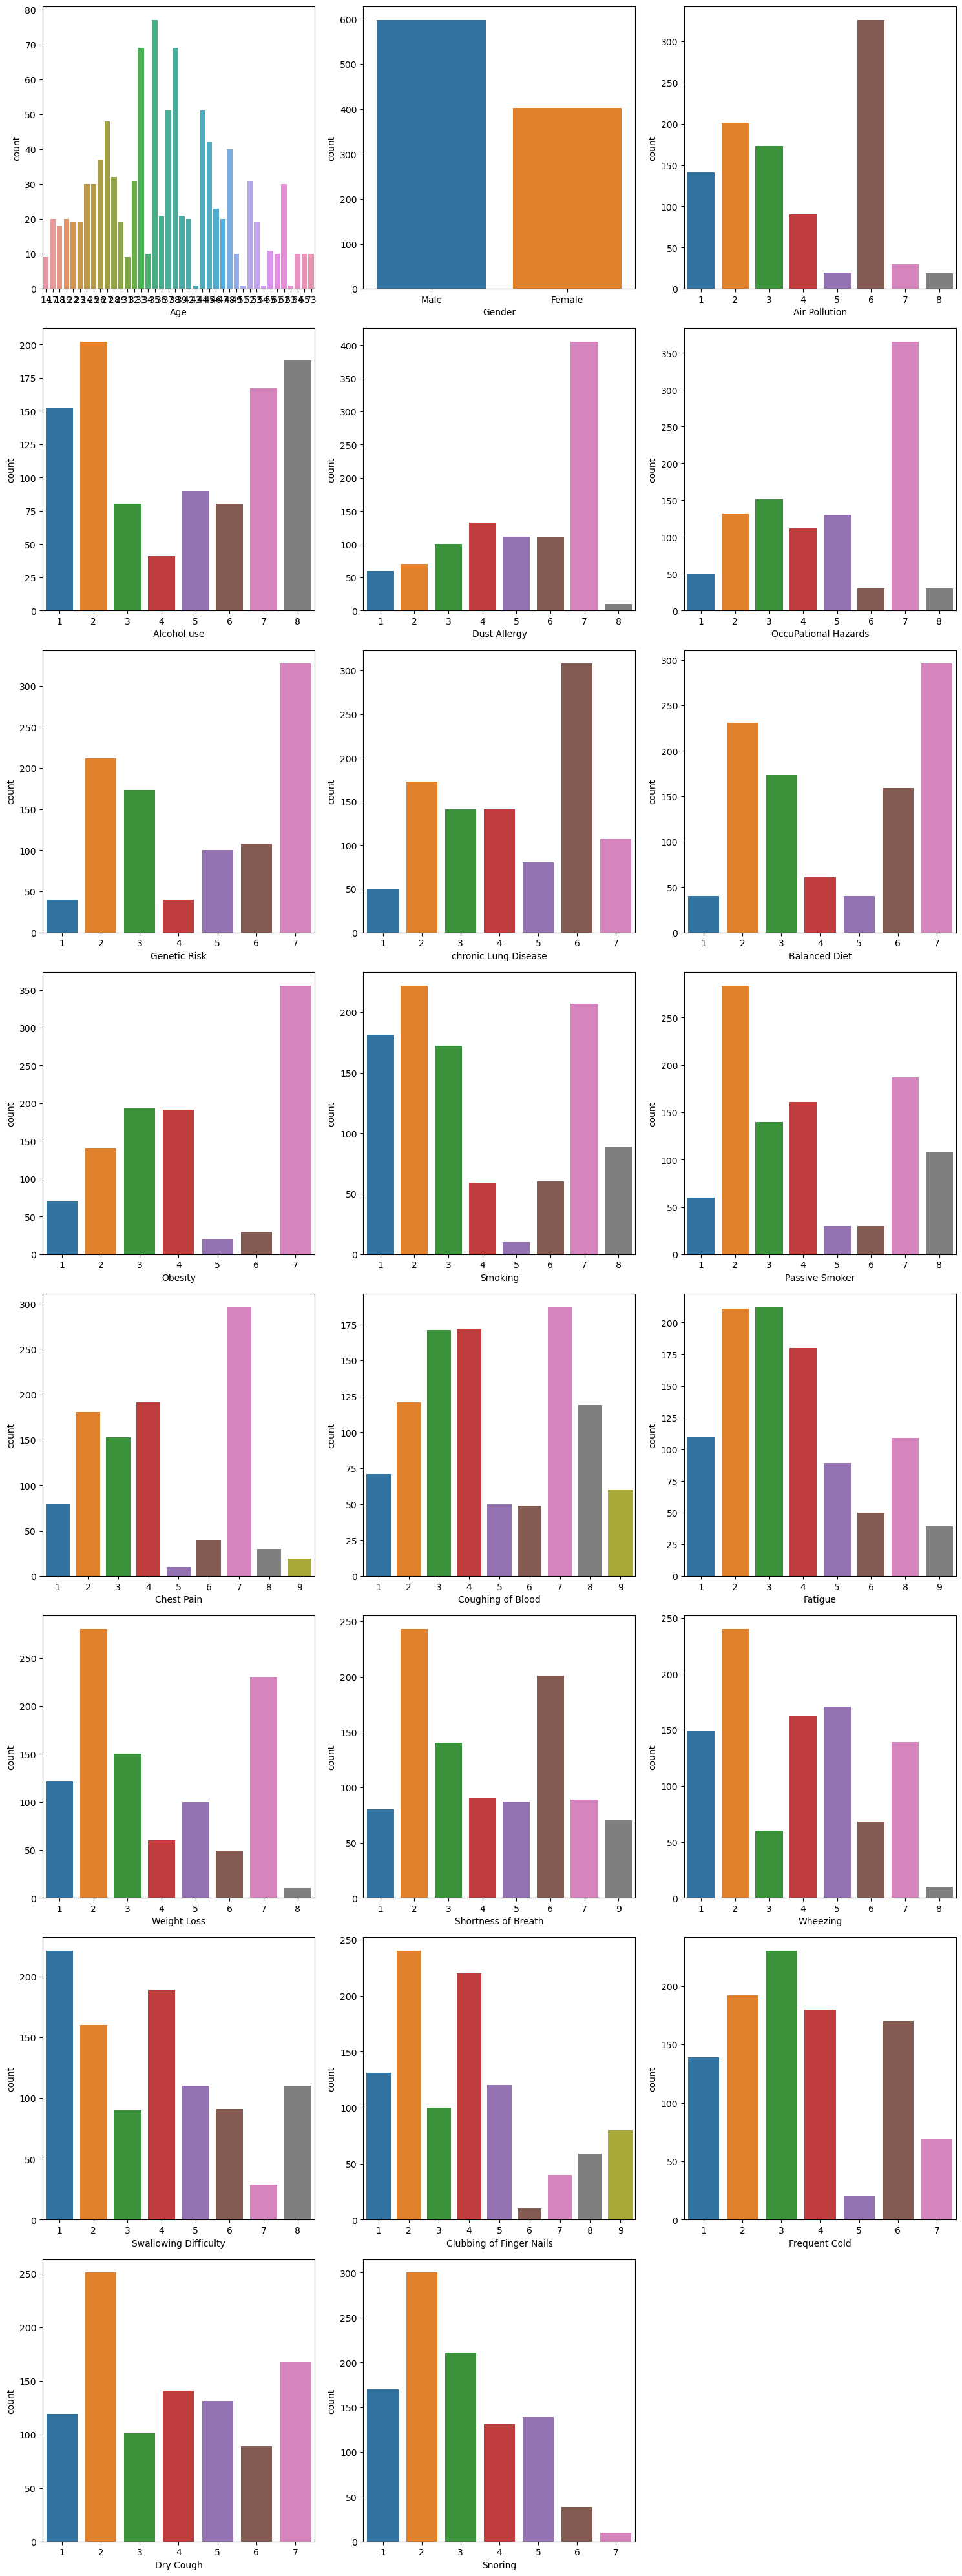

In [12]:
plotting_columns = [col for col in df.columns if df[col].dtype == 'int64']

nrows = (len(plotting_columns) + 2) // 3
ncols = min(3, len(plotting_columns))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(plotting_columns):
    row = i // ncols  
    col = i % ncols  
    ax = axes[row, col] 

   
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_xlabel(column)

    # Modifying x-axis labels for the 'Gender' column
    if column == 'Gender':
        ax.set_xticklabels(['Male', 'Female'])

# Removing the last graph cell from the subplot.
if i + 1 < nrows * ncols:
    for j in range(i + 1, nrows * ncols):
        row = j // ncols
        col = j % ncols
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Now let's check for Correlation in  the data

Correlation Analysis: Compute correlation coefficients between numerical variables to identify relationships and dependencies. Unexpected or illogical correlations between variables may suggest errors or inconsistencies in the data.

In [13]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


#### Let's interpret a few examples from the correlation matrix we've got:

- Age and Gender: The correlation coefficient is approximately -0.202. This suggests a weak negative correlation between age and gender, indicating that older individuals tend to be slightly more likely to be male.

- Air Pollution and Alcohol Use: The correlation coefficient is approximately 0.747. This indicates a strong positive correlation between air pollution and alcohol use. Higher levels of air pollution are associated with higher levels of alcohol use.

- Genetic Risk and Chronic Lung Disease: The correlation coefficient is approximately 0.836. This indicates a strong positive correlation between genetic risk and chronic lung disease. Higher levels of genetic risk are associated with a higher likelihood of having chronic lung disease.

- Balanced Diet and Obesity: The correlation coefficient is approximately 0.706. This suggests a moderate positive correlation between a balanced diet and obesity. Individuals who adhere to a balanced diet are more likely to have higher levels of obesity.

- Coughing of Blood and Shortness of Breath: The correlation coefficient is approximately 0.318. This suggests a moderate positive correlation between coughing of blood and shortness of breath. If a person experiences coughing of blood, there is a higher likelihood of also experiencing shortness of breath.

##### Let's generate a heatmap of the correlation matrix


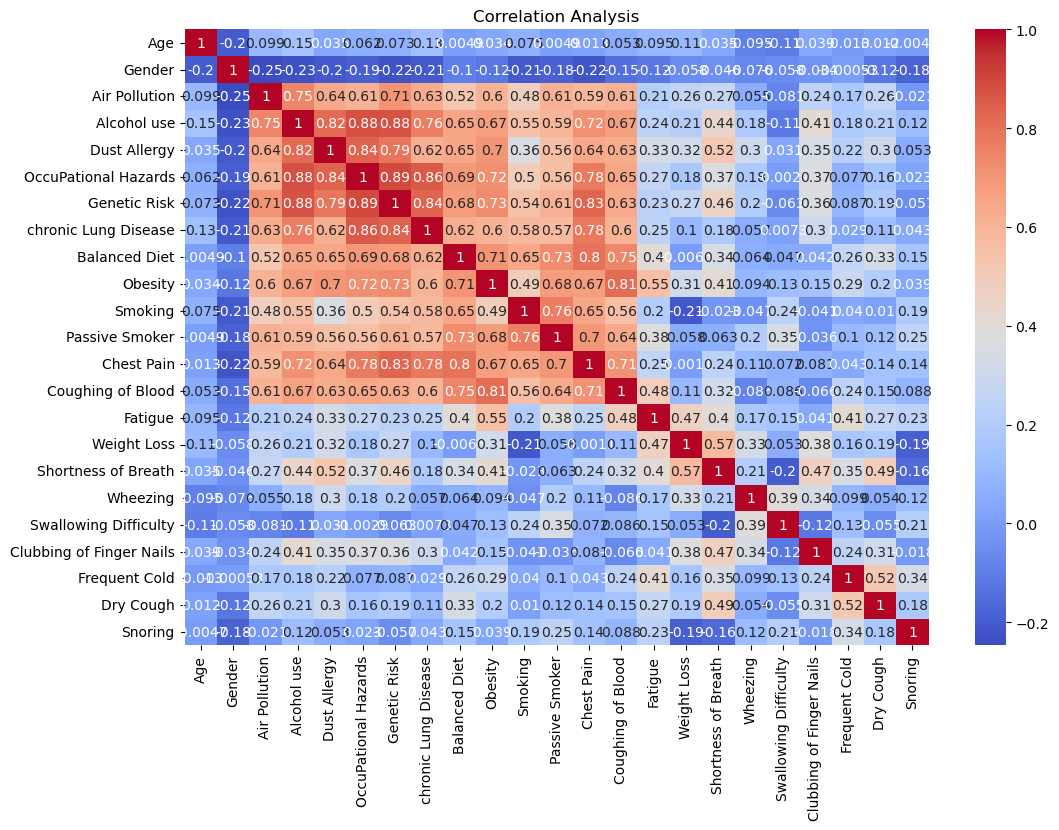

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

The heatmap helps identify patterns and dependencies among variables. Stronger correlations, whether positive or negative, are represented by darker or lighter shades in the heatmap, respectively. By examining the heatmap, we gain insights into which variables may be related and potentially use this information to make predictions or understand the factors influencing a particular outcome.


Even if two variables are strongly correlated, it does not necessarily mean that one variable causes the other to change. Correlation analysis helps identify associations but further investigation is needed to establish causal relationships.

##### Now let's proceed to Feature Engineering

### Feature Engineering
Let's convert the target variable 'y' to numeric using label encoding and perform feature selection using SelectKBest and chi-square test. 
- We select top 10 features and printed the selected features.

In [15]:
X = df.drop(['Patient Id', 'Level'], axis=1)
y = df['Level']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print(f"Selected Features: {selected_features}")

Selected Features: Index(['Air Pollution', 'Alcohol use', 'Genetic Risk', 'Balanced Diet',
       'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue'],
      dtype='object')


The feature selection step helps in reducing the dimensionality of the dataset and selecting the most relevant features that have a strong relationship with the target variable y = df['Level']

#### Splitting Data

In [16]:
X = df[['Air Pollution', 'Alcohol use', 'Genetic Risk', 'Balanced Diet',
       'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue']]

In [17]:
y = df['Level']

In [18]:
#Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Preprocessing

By selecting numeric features for scaling, we apply the scaling to the numeric features and convert the scaled data back to a Dataframe and then concatenate the scaled numeric features with the non-numeric features.

In [19]:
numeric_features = df.select_dtypes(include=np.number)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_features.columns)

preprocessed_data = pd.concat([scaled_df, df[selected_features]], axis=1)


### Creating a model

In [20]:
model = LogisticRegression()
model

LogisticRegression()

### Let's make prediction

Let's make predictions on the test data and evaluate our model by checking the accuracy but we'll first fit the train data into the model.

In [21]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.98


An accuracy of 0.98 indicates that the logistic regression model is performing well in predicting the lung cancer level. An accuracy of 0.98 means that the model correctly predicted the lung cancer level for 98% of the instances in the test set.

A high accuracy score suggests that the features we selected and the logistic regression model are effective in capturing the patterns and relationships in the data. However, it's important to consider other evaluation metrics as well to get a comprehensive understanding of the model's performance.

# Model Evaluation

#### Let's calculate the accuracy of the train and test data

In [22]:
train_accuracy = model.score(X_train, y_train) * 100
test_accuracy = model.score(X_test, y_test) * 100

print(f"Train data accuracy: {train_accuracy}%")
print(f"Test data accuracy: {test_accuracy}%")

Train data accuracy: 94.125%
Test data accuracy: 98.0%


### Here's what these results generally indicate:

###### Train data accuracy: 94.125%

- This means that the model correctly predicts the target variable for approximately 94.125% of the instances in the training data.

###### Test data accuracy: 98.0%

- This means that the model correctly predicts the target variable for approximately 98.0% of the instances in the test data. The test data accuracy indicates how well the model generalizes to unseen data.

The fact that the test data accuracy is slightly higher than the train data accuracy suggests that the model is performing well and not overfitting the training data. It demonstrates that the model has learned the underlying patterns in the data and is able to make accurate predictions on unseen instances.

##### Let's calculate the precision, recall and F1 score on the model

In [23]:
precision = precision_score(y_test, predictions, average='micro')

recall = recall_score(y_test, predictions, average='micro')

f1 = f1_score(y_test, predictions, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.98
Recall: 0.98
F1-score: 0.98


Based on the results obtained for precision, recall, and F1-score, it appears that the model is performing well. With precision, recall, and F1-score all at 0.98, it suggests that the model has a high level of accuracy in predicting both positive and negative instances.

But still need to check the confusion matrix. The confusion matrix provides a summary of the performance of the classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions. It helps evaluate the accuracy in the model and identify any patterns of misclassifications.

##### Let's perform Cross-Validation on the model

We'll be performing the cross-validation  across 5 folds

In [24]:
scores = cross_val_score(model, X, y, cv=5)  # cv=5 indicates 5-fold cross-validation

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.94  0.92  0.945 0.95  0.955]
Mean Accuracy: 0.942
Standard Deviation: 0.012083045973594542


#### Here's what these results mean:

###### Cross-Validation Scores: [0.94, 0.92, 0.945, 0.95, 0.955]

- These scores represent the accuracy achieved by the model on each fold of the cross-validation process.

###### Mean Accuracy: 0.942

- The mean accuracy is the average of the cross-validation scores. It provides an overall estimate of the model's performance across all folds.

###### Standard Deviation: 0.012083045973594542

- The standard deviation indicates the variability or spread of the cross-validation scores. It measures how much the scores deviate from the mean accuracy.

Overall, these results indicate that the model performs well with an average accuracy of 94.2% on unseen data. The relatively low standard deviation suggests that the model's performance is stable across different subsets of the data, indicating its robustness.


#### Let's perform confusion matrix

In [25]:
cm = confusion_matrix(y_test, predictions)

print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[82  0  0]
 [ 0 52  3]
 [ 0  1 62]]


- The first row represents the true labels for the "low" class. It shows that there are 82 instances that belong to the "low" class, and the model correctly predicted all of them as "low" (true positives).
- The second row represents the true labels for the "mid" class. It indicates that there are 52 instances that belong to the "mid" class. The model correctly predicted 52 instances as "mid" (true positives), but it misclassified 3 instances from the "mid" class as "high" (false negatives).
- The third row represents the true labels for the "high" class. It shows that there are 62 instances that belong to the "high" class. The model correctly predicted 62 instances as "high" (true positives), but it misclassified 1 instance from the "high" class as "mid" (false negative).


##### In summary:

- The model performed well in predicting the "low" and "high" classes, with all instances correctly classified.
- However, it struggled to distinguish between the "mid" and "high" classes, as it misclassified 3 instances from the "mid" class as "high" and 1 instance from the "high" class as "mid".

The confusion matrix provides a detailed breakdown of the model's performance across different classes


#### Let's test the model with a new data

In [26]:
model.predict([[2,2,1,7,3,2,2,3,3,4]])

array(['Low'], dtype=object)

#####  The result shows that the patient has no cancer
- If the result shows ['Mid'], that means the patient will have cancer if he/she doesn't start treatment immediatly
- If the result shows ['High'], it means the patient has cancer and should start treatment

#### CONCLUSION

In conclusion, the project has successfully developed a robust classification model for predicting lung cancer with high accuracy and performance. Through rigorous data analysis, feature engineering, and model evaluation, we have demonstrated the effectiveness of the model in accurately identifying individuals at risk of lung cancer. These findings highlight the potential of machine learning techniques in improving early detection and contributing to better patient outcomes in the field of medical research.